In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sb
sb.set()


In [3]:
df = pd.read_csv('C://Users//Raj-Lenovo//Desktop//FORE//TERM-3//MLP//Coding//german_credit_data.csv')

In [4]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [5]:
df.tail()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,999,27,male,2,own,moderate,moderate,4576,45,car,good


In [6]:
df.shape

(1000, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [9]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [11]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [12]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [13]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [14]:
df['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [15]:
df['Checking account'].mode()

0    little
dtype: object

In [16]:
df['Checking account'].fillna(value = 'mode', axis = 0, inplace = True)

In [17]:
df['Saving accounts'].fillna(value = 'mode', axis = 0, inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [19]:
duplicate_rows_df = df[df.duplicated()]
print('Number of duplicate rows:', duplicate_rows_df.shape)

Number of duplicate rows: (0, 10)


In [22]:
num_atr=['Age' , 'Credit amount' , 'Duration']

cat_atr=['Sex' , 'Job' , 'Housing' , 'Saving accounts' , 'Checking account' , 'Purpose']

In [24]:
df.corr()

,Age,Job,Credit amount,Duration
Age,1.000000,0.015673,0.032716,-0.036136
Job,0.015673,1.000000,0.285385,0.210910
Credit amount,0.032716,0.285385,1.000000,0.624984
Duration,-0.036136,0.210910,0.624984,1.000000


In [25]:
df.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [26]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

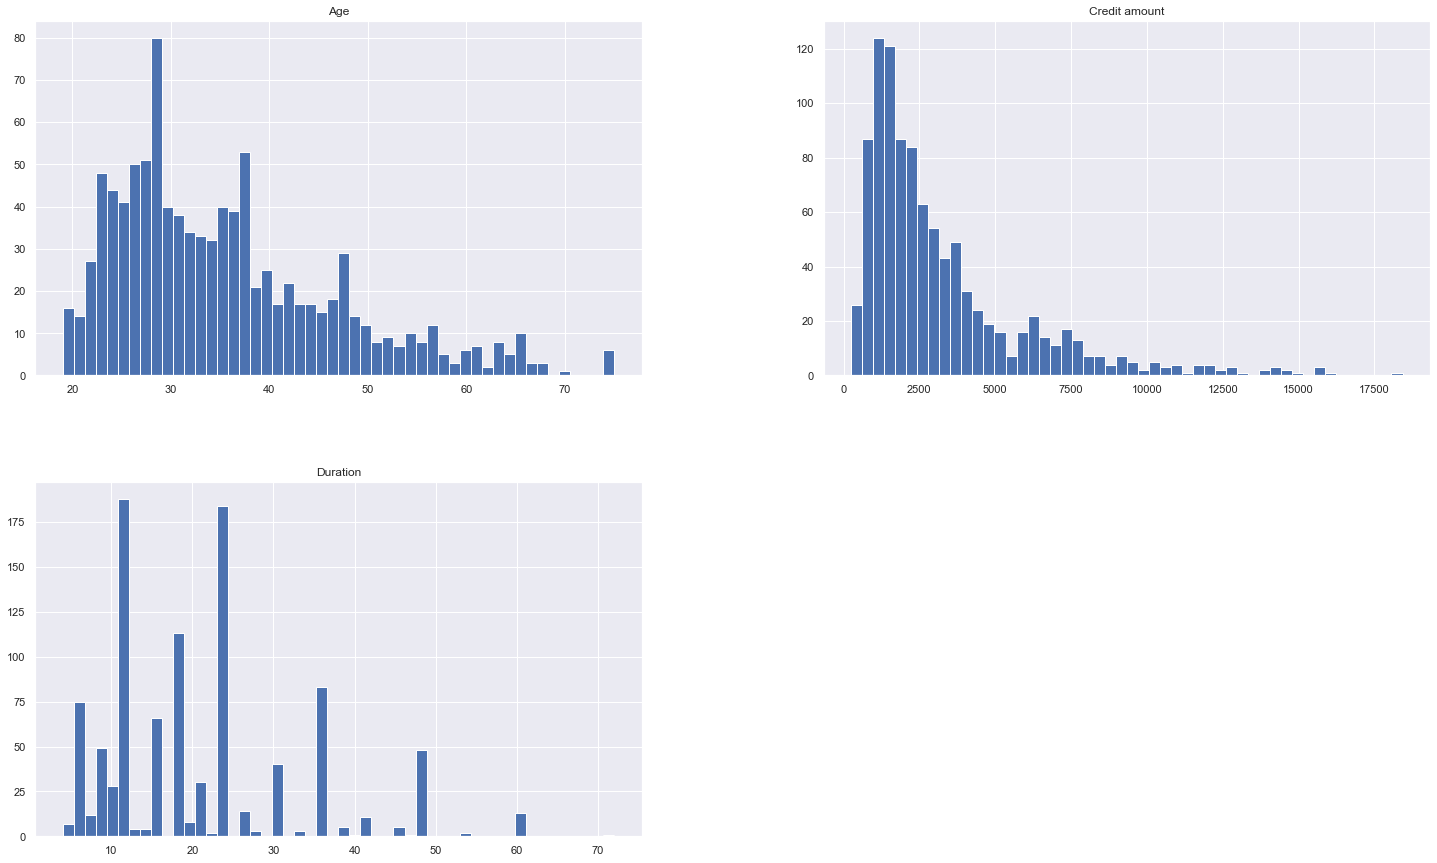

In [27]:
df[num_atr].hist(bins=50, figsize=(25,15)) 
plt.show()

In [28]:
#KNN

In [29]:
from sklearn.model_selection import train_test_split
X= df.drop(['Risk'], axis=1)
y= df['Risk']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.preprocessing import LabelEncoder

In [31]:
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)

C:\Users\Raj-Lenovo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [32]:
X_train[cat_atr].head()

,Sex,Job,Housing,Saving accounts,Checking account,Purpose
731,1,1,2,0,0,5
716,1,2,1,1,1,5
640,0,0,1,0,0,3
804,0,0,2,1,2,1
737,1,1,1,2,0,1


In [33]:
ss = StandardScaler()
ss.fit_transform(X_train[num_atr])

array([[-1.25959752, -0.44363756,  0.25913751],
       [ 0.3716242 , -0.05891106,  0.76208462],
       [-0.74447487, -0.88024919, -0.2438096 ],
       ...,
       [ 0.88674684,  0.12356931, -0.49528316],
       [-0.48691355, -0.50152301,  0.25913751],
       [ 0.11406287, -0.40375307, -0.2438096 ]])

In [35]:
a = X_train[cat_atr]
b = ss.transform(X_train[num_atr])

Xtr = np.hstack([a,b])
Xtr.shape 

(700, 9)

In [36]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(Xtr, y_train)

KNeighborsClassifier(metric='euclidean')

In [37]:
ss = StandardScaler()
ss.fit_transform(X_test[num_atr])
le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)
a1 = X_test[cat_atr]
b1 = ss.transform(X_test[num_atr])

Xtr1 = np.hstack([a1,b1]) 
Xtr1.shape 

C:\Users\Raj-Lenovo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(300, 9)

In [38]:
y_pred = knn.predict(Xtr1)

In [39]:
confusion_matrix(y_test, y_pred)

array([[ 26,  60],
       [ 27, 187]], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

In [47]:
accuracy_score(y_test, y_pred)

0.71

In [48]:
precision_recall_fscore_support(y_test, y_pred)

(array([0.49056604, 0.75708502]),
 array([0.30232558, 0.87383178]),
 array([0.37410072, 0.81127983]),
 array([ 86, 214], dtype=int64))

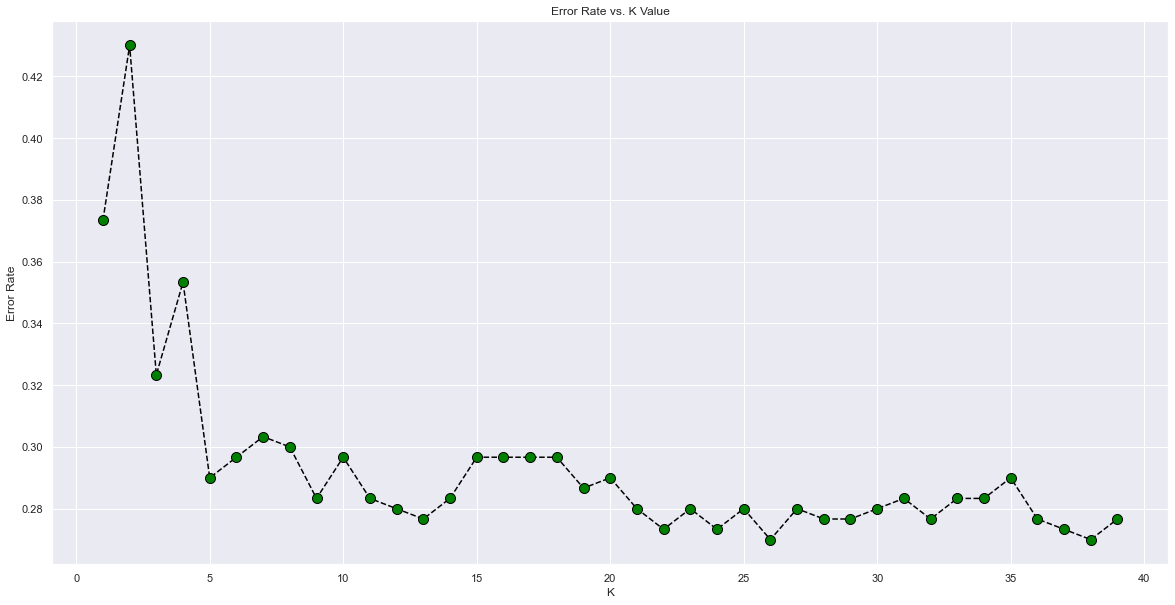

Minimum error:- 0.27 at K = 26


In [50]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(Xtr,y_train)
 pred_i = knn.predict(Xtr1)
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(20,10))
plt.plot(range(1,40),error_rate,color='black', linestyle='dashed', 
         marker='o',markerfacecolor='green', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [51]:
knn = KNeighborsClassifier(n_neighbors=26, metric='euclidean')
knn.fit(Xtr, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=26)

In [52]:
y_pred = knn.predict(Xtr1)

In [54]:
accuracy_score(y_test, y_pred)

0.73

In [55]:
#Decision tree


In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [61]:
X= df.drop(['Risk'], axis=1)
y= df['Risk']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [62]:
X.shape

(1000, 9)

In [63]:
Y.shape

(1000,)

In [64]:
ss = StandardScaler()
ss.fit_transform(X_test[num_atr])
le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)
a1 = X_test[cat_atr]
b1 = ss.transform(X_test[num_atr])

Xtr1 = np.hstack([a1,b1]) 
Xtr1.shape 

array([[-1.17271041e-01,  1.25873482e+00, -4.77494135e-01],
       [ 7.24834839e-01,  4.48424907e+00,  1.22494675e+00],
       [-1.17271041e-01, -2.06301127e-01, -7.20699977e-01],
       [ 6.31267519e-01,  3.97217765e-02,  1.22494675e+00],
       [-1.05294424e+00,  4.54773516e-01,  2.19777012e+00],
       [ 7.24834839e-01, -7.13029523e-01, -7.20699977e-01],
       [ 6.98635989e-02,  7.04377538e-01, -2.34288294e-01],
       [-8.65809601e-01, -8.69524441e-01, -1.04497443e+00],
       [-3.04405681e-01, -9.43295500e-01, -7.20699977e-01],
       [-6.78674961e-01, -4.51965918e-01, -7.20699977e-01],
       [-1.17271041e-01, -5.34689776e-01,  1.22494675e+00],
       [-7.72242281e-01,  2.89784182e-02,  4.95329230e-01],
       [-5.85107641e-01,  1.37189820e+00,  1.71135844e+00],
       [ 7.24834839e-01, -6.71846650e-01, -4.77494135e-01],
       [ 7.24834839e-01,  1.45318961e+00,  2.52123389e-01],
       [ 1.09910412e+00, -4.83837881e-01, -2.34288294e-01],
       [-8.65809601e-01, -3.18748276e-01

C:\Users\Raj-Lenovo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(300, 9)

In [66]:
dt = DecisionTreeClassifier(criterion="gini", max_depth=None)

In [67]:
dt.fit(Xtr,y_train)

DecisionTreeClassifier()

In [68]:
y_pred = dt.predict(Xtr1)

In [69]:
np.sum((y_test == y_pred))/y_test.size

0.6366666666666667

In [70]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

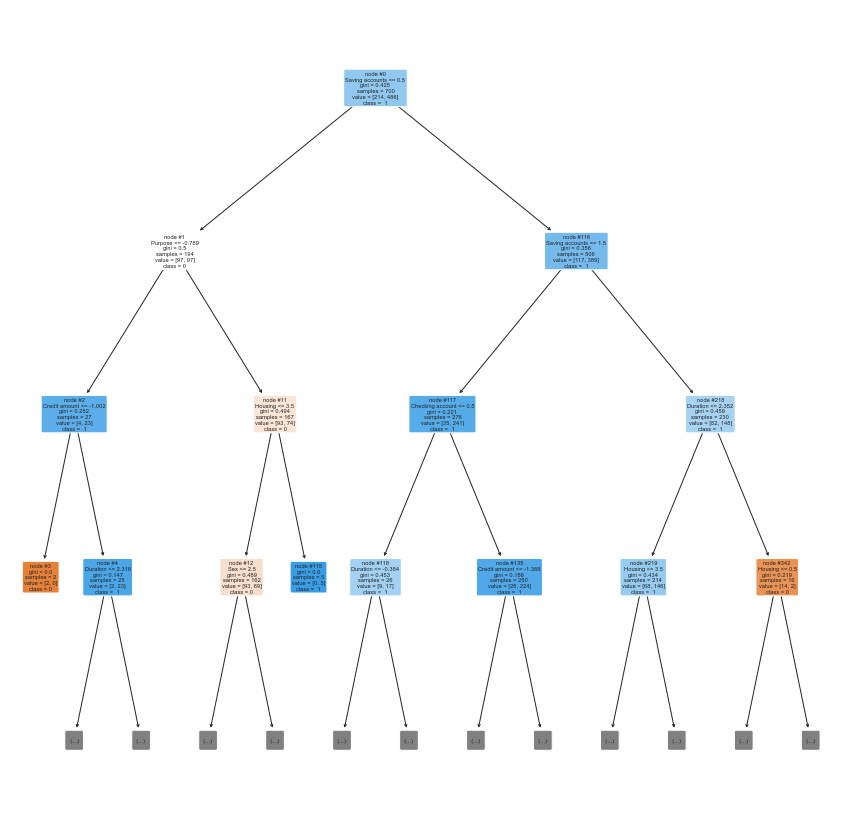

In [71]:
_=plt.figure(figsize=(15,15))
_=plot_tree(
            dt,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
            class_names = ['0',' 1']
            )

_=plt.show()

In [72]:
# Random Forest

In [73]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(Xtr,y_train)
y_pred=clf.predict(Xtr1)

RandomForestClassifier()

In [74]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

NameError: name 'metrics' is not defined

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

In [76]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75


In [77]:
metrics.confusion_matrix(y_test, y_pred)

array([[ 39,  47],
       [ 28, 186]], dtype=int64)

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bad       0.58      0.45      0.51        86
        good       0.80      0.87      0.83       214

    accuracy                           0.75       300
   macro avg       0.69      0.66      0.67       300
weighted avg       0.74      0.75      0.74       300



In [82]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [83]:
feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)
feature_imp

7    0.256350
6    0.187684
8    0.149666
4    0.119766
5    0.089221
3    0.065978
1    0.054162
2    0.046733
0    0.030441
dtype: float64

In [85]:
list(zip(df.columns, feature_imp))

[('Age', 0.25635041688096977),
 ('Sex', 0.18768368750790657),
 ('Job', 0.14966627724194242),
 ('Housing', 0.1197661400718283),
 ('Saving accounts', 0.08922060024321204),
 ('Checking account', 0.06597779796682995),
 ('Credit amount', 0.054161852321622656),
 ('Duration', 0.046732556430942686),
 ('Purpose', 0.03044067133474572)]

<AxesSubplot:>

Text(0.5, 0, 'Score')

Text(0, 0.5, 'Features')

No handles with labels found to put in legend.


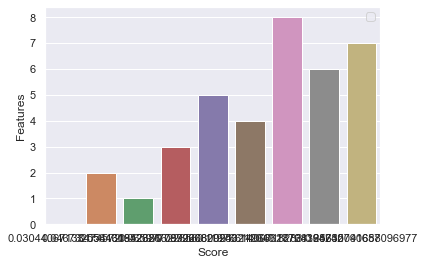

In [87]:
%matplotlib inline
sb.barplot(x=feature_imp, y=feature_imp.index)
sb.set(rc={'figure.figsize':(20,15)})
plt.xlabel('Score')
plt.ylabel('Features')
plt.legend()
plt.show()

In [90]:
lf=RandomForestClassifier(n_estimators=100)
clf.fit(Xtr,y_train)
y_pred=clf.predict(Xtr1)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

RandomForestClassifier()

Accuracy: 0.7433333333333333


In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bad       0.57      0.42      0.48        86
        good       0.79      0.87      0.83       214

    accuracy                           0.74       300
   macro avg       0.68      0.65      0.66       300
weighted avg       0.73      0.74      0.73       300

